In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor                               #importing neccessary librabries

In [ ]:
df=pd.read_csv('/content/Thyroid_test_unclean.csv', encoding='ISO-8859-1')      #Uploading data

Data Description

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,Region,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,Brampton,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,Mississauga,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,Barrie,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,North York,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,Toronto,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               382 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     382 non-null    object
 13  Region                383 non-null    object
 14  M                     383 non-null    object
 15  Stage                 382 non-null    ob

In [ ]:
df.shape

(383, 18)

Data Preprocessing

In [ ]:
df.isnull().sum()                                                               #Checking for null values

Age                     0
Gender                  0
Smoking                 1
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       1
Region                  0
M                       0
Stage                   1
Response                0
Recurred                0
dtype: int64

In [ ]:
#Calculating mode values to replace the null values

modeVal1 = df['Smoking'].mode()[0]
modeVal2 = df['N'].mode()[0]
modeVal3 = df['Stage'].mode()[0]

#Filling null values with mode value

df['Smoking'].fillna(modeVal1,inplace=True)
df['N'].fillna(modeVal2,inplace=True)
df['Stage'].fillna(modeVal3,inplace=True)

In [ ]:
#Checking if null values are removed!
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
Region                  0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
#Checking duplicate rows
df.duplicated().sum()

7

In [ ]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns='Region',inplace=True)       #Dropping region columns because it has no relation with the target variable

In [ ]:
df.head(5)                                   #Printing the first 5 rows to see the data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
#Checking spelling mistakes in the dataset
for c in df.columns:
  vals=df[c].unique()
  print(f"{c},{vals}")

Age,[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender,['F' 'M']
Smoking,['No' 'Yes']
Hx Smoking,['No' 'Yes']
Hx Radiothreapy,['No' 'Yes']
Thyroid Function,['Euthyroid' 'Clinical HyperThyroidism' 'Clinical Hyperthyroidism'
 'Clinical Hypothyroidism' 'Subclinical Hyperthyroidism'
 'Subclinical Hypothyroidism' 'Clinical HyperTyroidism']
Physical Examination,['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy,['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology,['Micropapillary' '...Micropapillary' 'Papillary' 'Follicular'
 'Micropapillary\\\\' '\x85Papillary' 'Hurthel cell' 'Papillary_']
Focality,['Uni-Focal' 'Multi-Focal']
Risk,['Low' 'Intermediate' 'High']
T,['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N,['N0' 'N1b' 'N1a']
M,['M0' 'M1']
Stage,['I' 'II' 

In [ ]:
#Removing the spelling mistakes from Pathology column

df['Pathology']=df['Pathology'].str.lower().str.strip()

df['Pathology'] = df['Pathology'].str.replace(r'\\','')
df['Pathology'] = df['Pathology'].str.replace(r'\x85','')

#Manually handing the incorrect data
corrections={
    '...micropapillary':'micropapillary',
    'papillary_':'papillary'
}
df['Pathology']=df['Pathology'].replace(corrections)

for c in df.columns:
  vals=df[c].unique()
  print(f"{c},{vals}")

Age,[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender,['F' 'M']
Smoking,['No' 'Yes']
Hx Smoking,['No' 'Yes']
Hx Radiothreapy,['No' 'Yes']
Thyroid Function,['Euthyroid' 'Clinical HyperThyroidism' 'Clinical Hyperthyroidism'
 'Clinical Hypothyroidism' 'Subclinical Hyperthyroidism'
 'Subclinical Hypothyroidism' 'Clinical HyperTyroidism']
Physical Examination,['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy,['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology,['micropapillary' 'papillary' 'follicular' 'hurthel cell']
Focality,['Uni-Focal' 'Multi-Focal']
Risk,['Low' 'Intermediate' 'High']
T,['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N,['N0' 'N1b' 'N1a']
M,['M0' 'M1']
Stage,['I' 'II' 'IVB' 'III' 'IVA']
Response,['Indeterminate' 'Excellent' 'Structural In

Visualization

<Axes: xlabel='Age'>

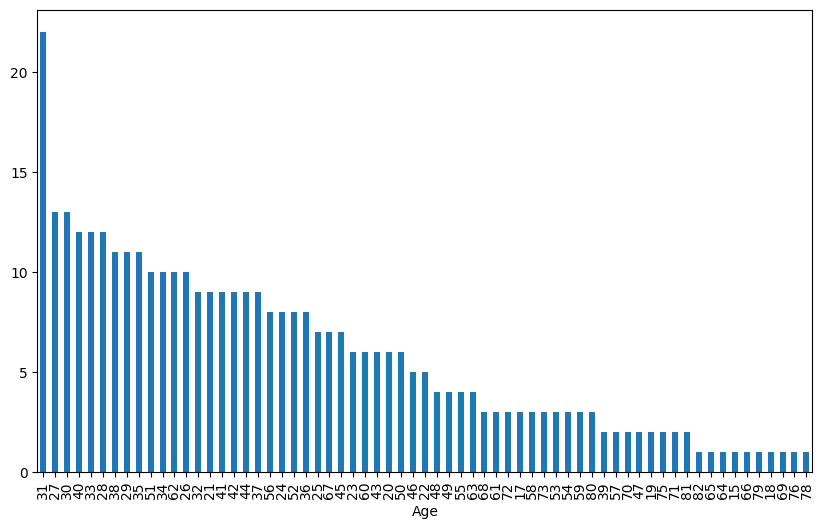

In [ ]:
plt.figure(figsize=(10,6))
df['Age'].value_counts().plot(kind='bar')                                       #Plotting the graph for the count of age

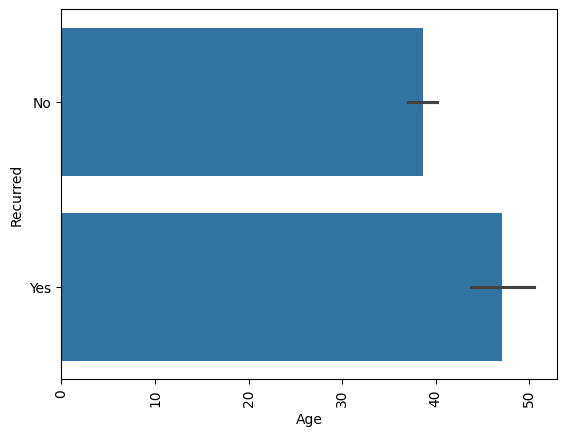

In [ ]:
sns.barplot(x=df['Age'], y=df['Recurred'])                                      #To check the recurrence of cancer with respect to age
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Gender'>

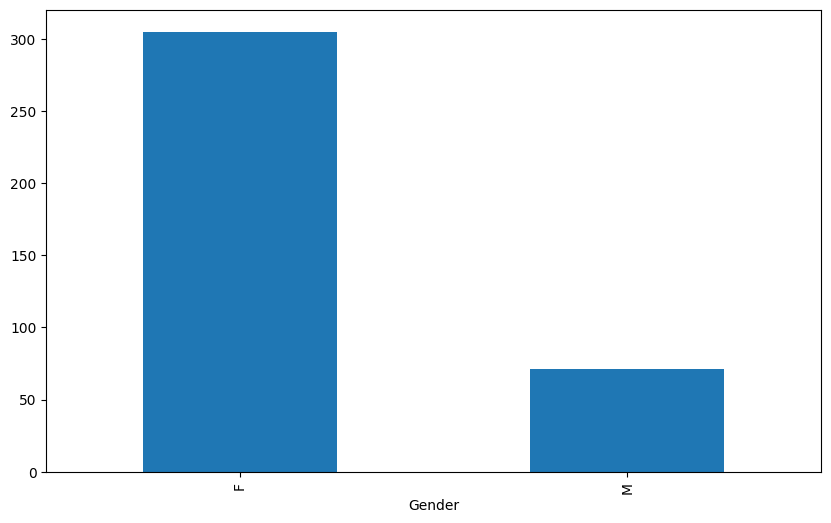

In [ ]:
plt.figure(figsize=(10,6))                                                      #Plotting the bar graph for the count of females and males in the data
df['Gender'].value_counts().plot(kind='bar')

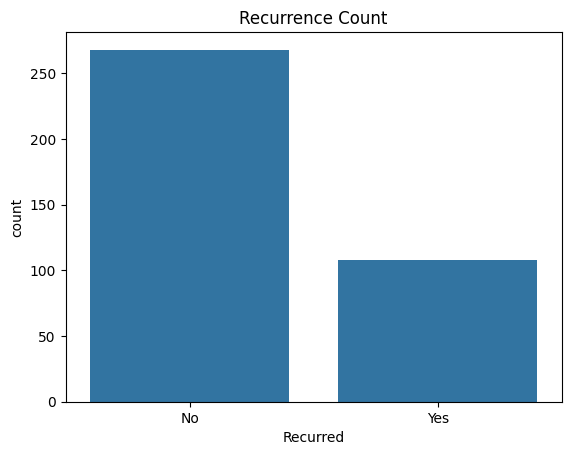

In [ ]:
sns.countplot(x='Recurred', data=df)                                            #Counting the recurrence of cancer in the dataset
plt.title('Recurrence Count')
plt.show()

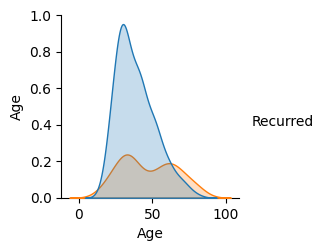

In [ ]:
sns.pairplot(df, hue='Recurred')                                                #Paiplot Hue graph for recurrence of cancer with respect to age
plt.show()

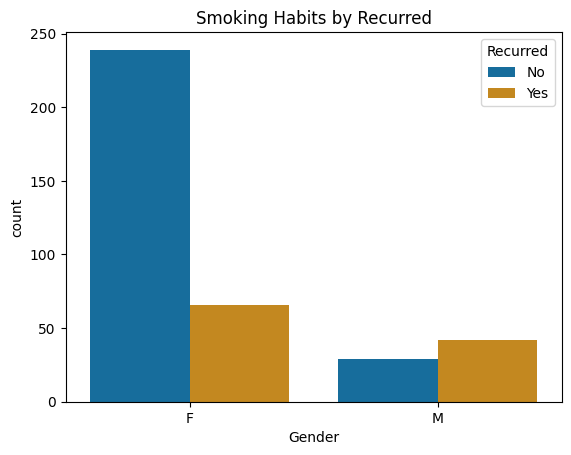

In [ ]:
sns.countplot(x="Gender", hue="Recurred", data=df, palette='colorblind')        #Plotting a hue bar graph for gender and recurrence
plt.title("Smoking Habits by Recurred")
plt.show()

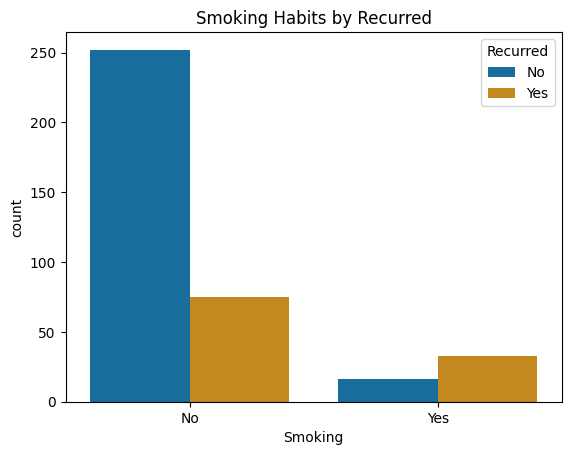

In [ ]:
sns.countplot(x="Smoking", hue="Recurred", data=df, palette='colorblind')       #Plotting a hue bar graph for smoking and recurrence
plt.title("Smoking Habits by Recurred")
plt.show()

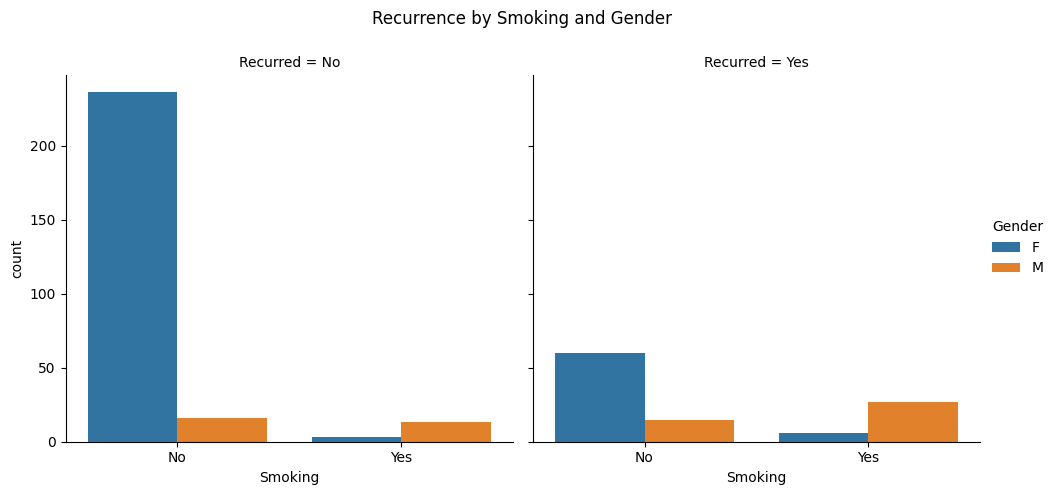

In [ ]:
sns.catplot(x="Smoking", hue="Gender", col="Recurred", data=df, kind="count")   #Plotting two hue bar graph for gender and smoking with respect to recurrence

plt.subplots_adjust(top=0.85)  # Adjust the plot to make space for title

plt.suptitle('Recurrence by Smoking and Gender')

plt.show()

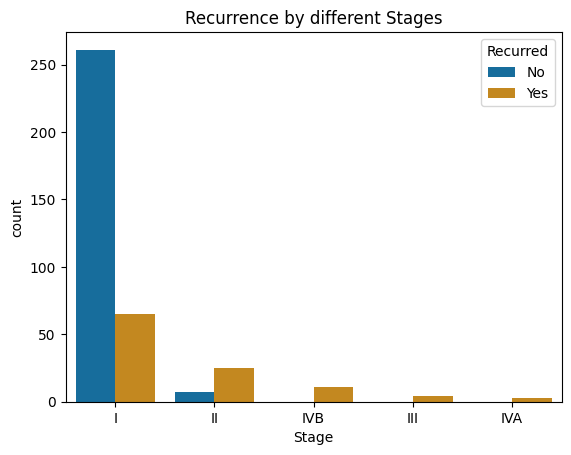

In [ ]:
sns.countplot(x="Stage", hue="Recurred", data=df, palette='colorblind')         #Plotting a hue bar graph for diff stages and recurrence
plt.title("Recurrence by different Stages")
plt.show()

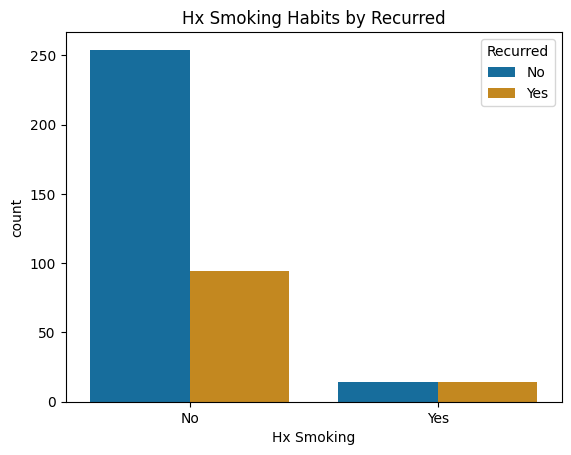

In [ ]:
sns.countplot(x="Hx Smoking", hue="Recurred", data=df, palette='colorblind')    #Plotting a hue bar graph for Hx Smoking and recurrence
plt.title("Hx Smoking Habits by Recurred")
plt.show()

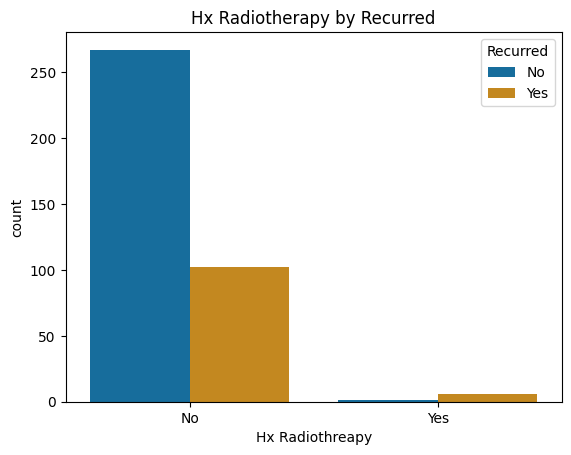

In [ ]:
sns.countplot(x="Hx Radiothreapy", hue="Recurred", data=df, palette='colorblind')    #Plotting a hue bar graph for Hx Radiotherapy and recurrence
plt.title("Hx Radiotherapy by Recurred")
plt.show()

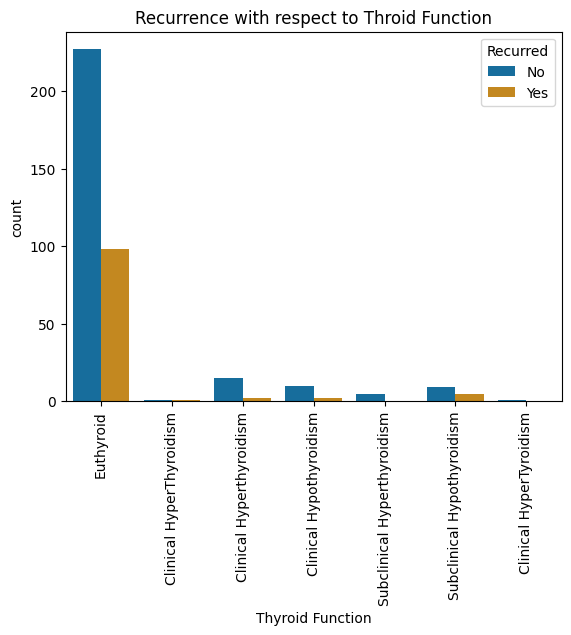

In [ ]:
sns.countplot(x="Thyroid Function", hue="Recurred", data=df, palette='colorblind')      #Plotting a hue bar graph for thyroid function and recurrence
plt.title("Recurrence with respect to Throid Function")
plt.xticks(rotation = 90)
plt.show()

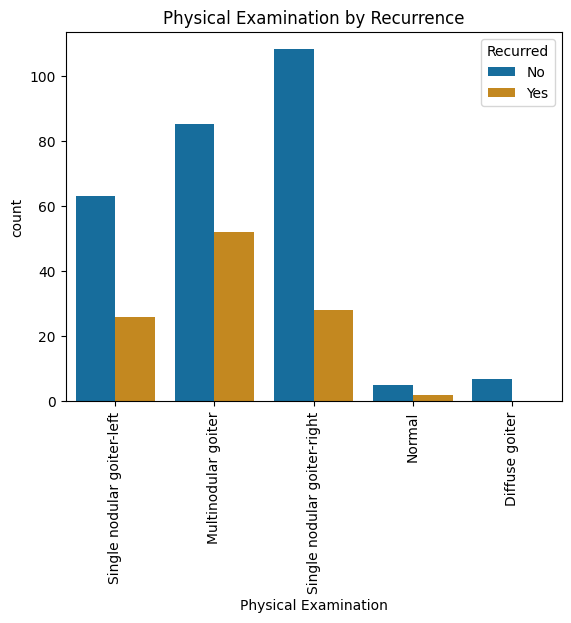

In [ ]:
sns.countplot(x="Physical Examination", hue="Recurred", data=df, palette='colorblind')      #Plotting a hue bar graph for physical examination and recurrence
plt.title("Physical Examination by Recurrence")
plt.xticks(rotation=90)
plt.show()

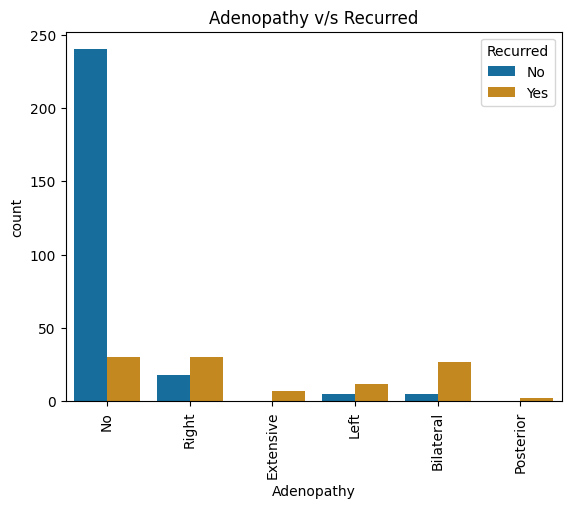

In [ ]:
sns.countplot(x="Adenopathy", hue="Recurred", data=df, palette='colorblind')    #Plotting a hue bar graph for adenopathy and recurrence
plt.title("Adenopathy v/s Recurred")
plt.xticks(rotation=90)
plt.show()


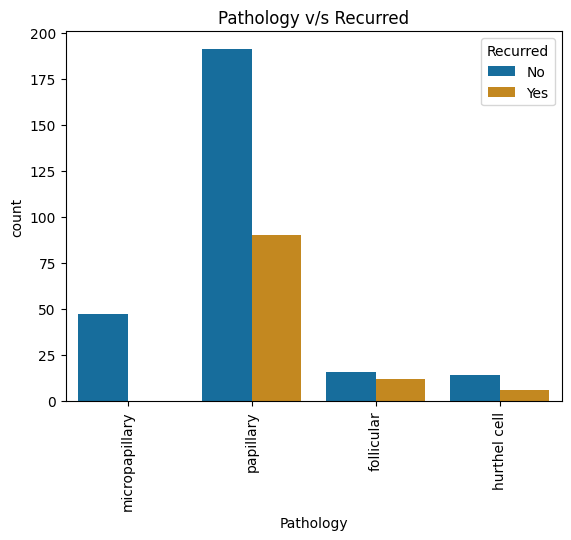

In [ ]:
sns.countplot(x="Pathology", hue="Recurred", data=df, palette='colorblind')     #Plotting a hue bar graph for pathology and recurrence
plt.title("Pathology v/s Recurred")
plt.xticks(rotation=90)
plt.show()


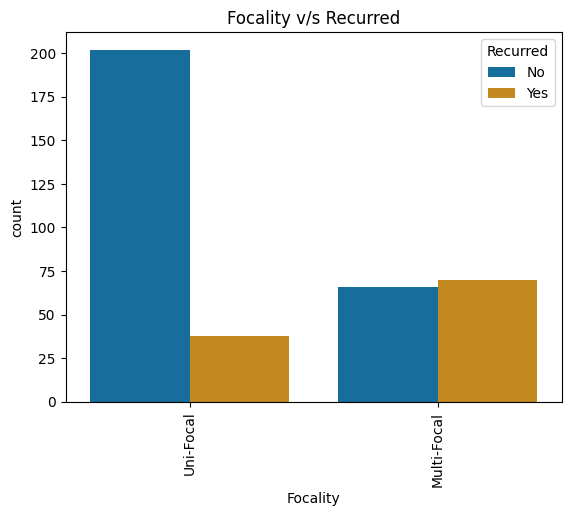

In [ ]:
sns.countplot(x="Focality", hue="Recurred", data=df, palette='colorblind')      #Plotting a hue bar graph for focality and recurrence
plt.title("Focality v/s Recurred")
plt.xticks(rotation=90)
plt.show()

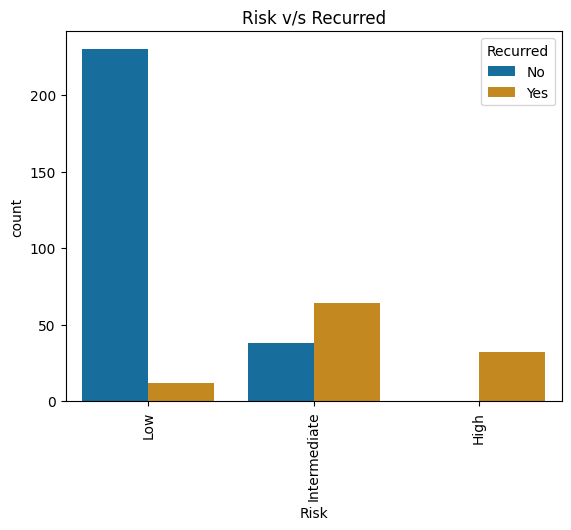

In [ ]:
sns.countplot(x="Risk", hue="Recurred", data=df, palette='colorblind')          #Plotting a hue bar graph for risk level and recurrence
plt.title("Risk v/s Recurred")
plt.xticks(rotation=90)
plt.show()

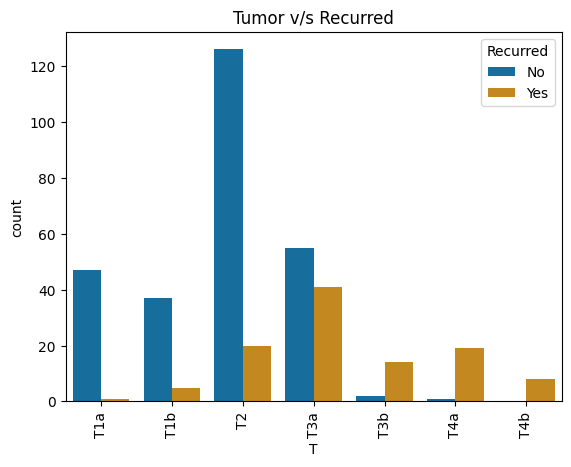

In [ ]:
sns.countplot(x="T", hue="Recurred", data=df, palette='colorblind')             #Plotting a hue bar graph for type of tumour and recurrence
plt.title("Tumor v/s Recurred")
plt.xticks(rotation=90)
plt.show()

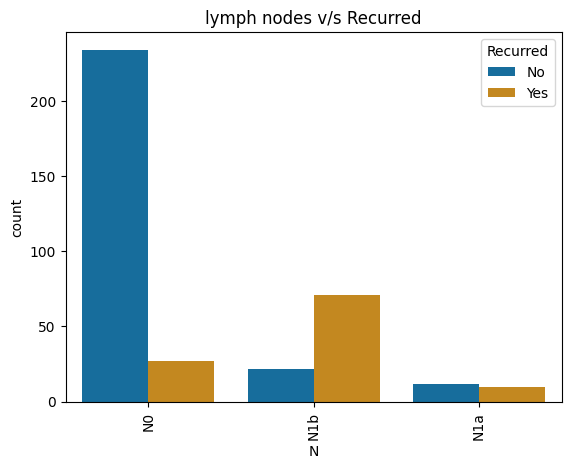

In [ ]:
sns.countplot(x="N", hue="Recurred", data=df, palette='colorblind')             #Plotting a hue bar graph for diff lymph nodes and recurrence
plt.title("lymph nodes v/s Recurred")
plt.xticks(rotation=90)
plt.show()



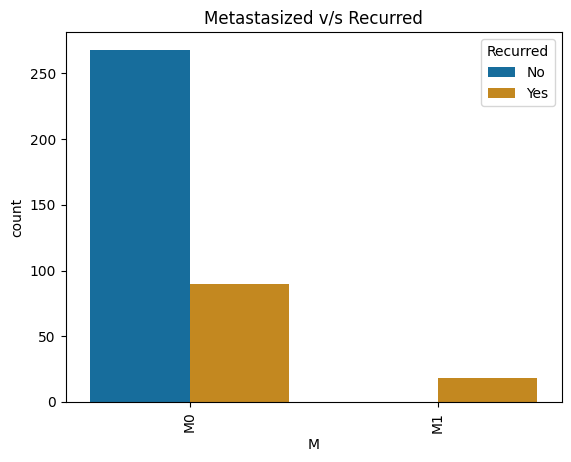

In [ ]:
sns.countplot(x="M", hue="Recurred", data=df, palette='colorblind')             #Plotting a hue bar graph for types of metatasized and recurrence
plt.title("Metastasized v/s Recurred")
plt.xticks(rotation=90)
plt.show()

Feature Engineering

In [ ]:
#Assigning categorical columns to a variable for encoding
x=df[['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality', 'Risk','T','N','M','Stage','Response','Recurred']]

In [ ]:
x.head(10)

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,F,No,No,No,Euthyroid,Multinodular goiter,No,micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,M,Yes,No,No,Euthyroid,Multinodular goiter,No,micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,F,No,Yes,No,Clinical HyperThyroidism,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,F,No,No,No,Euthyroid,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,F,No,No,No,Euthyroid,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,F,No,No,No,Euthyroid,Single nodular goiter-right,No,micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
#Encoding the data
df_encoded = pd.get_dummies(x)
df_encoded = df_encoded.astype(int)
# Display the encoded DataFrame
print(df_encoded)

     Gender_F  Gender_M  Smoking_No  Smoking_Yes  Hx Smoking_No  \
0           1         0           1            0              1   
1           1         0           1            0              0   
2           1         0           1            0              1   
3           1         0           1            0              1   
4           1         0           1            0              1   
..        ...       ...         ...          ...            ...   
378         0         1           0            1              0   
379         0         1           0            1              1   
380         0         1           0            1              0   
381         0         1           0            1              0   
382         0         1           0            1              1   

     Hx Smoking_Yes  Hx Radiothreapy_No  Hx Radiothreapy_Yes  \
0                 0                   1                    0   
1                 1                   1                    0   
2  

In [ ]:
#Concatinating the numerical columns with encoded columns
new_df=pd.concat([df['Age'],df_encoded],axis=1)

In [ ]:
df_encoded.columns

Index(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes', 'Hx Smoking_No',
       'Hx Smoking_Yes', 'Hx Radiothreapy_No', 'Hx Radiothreapy_Yes',
       'Thyroid Function_Clinical HyperThyroidism',
       'Thyroid Function_Clinical HyperTyroidism',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_follicular', 'Pathology_hurthel cell',
       'Pathology_micropapillary', 'Pathology_papi

In [ ]:
new_df.head(10)

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical HyperThyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_No,Recurred_Yes
0,27,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,30,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,62,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,62,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5,52,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
6,41,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
7,46,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8,51,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9,40,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#Removing the Recurred no column as it is of no use
new_df.drop('Recurred_No',axis=1)

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical HyperThyroidism,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,34,1,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,30,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,62,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,62,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
379,81,0,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
380,72,0,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
381,61,0,1,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
new_df.columns

Index(['Age', 'Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical HyperThyroidism',
       'Thyroid Function_Clinical HyperTyroidism',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_follicular', 'Pathology_hurthel cell',
       'Pathology_micropapillary', 'Patholo

In [ ]:
#Creating a copy of data frame
new_df1=new_df.copy()

In [ ]:
new_df1.columns

Index(['Age', 'Gender_F', 'Smoking_No', 'Hx Smoking_No', 'Hx Radiothreapy_No',
       'Thyroid Function_Clinical HyperThyroidism',
       'Thyroid Function_Clinical HyperTyroidism',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_follicular', 'Pathology_hurthel cell',
       'Pathology_micropapillary', 'Pathology_papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_H

In [ ]:
#Dropping the columns which are not required
new_df1=new_df1.drop(columns=['Gender_M','Smoking_Yes','Hx Smoking_Yes','Hx Radiothreapy_Yes','M_M1','Recurred_No'] ,axis=1)

In [ ]:
new_df1

,Age,Gender_F,Smoking_No,Hx Smoking_No,Hx Radiothreapy_No,Thyroid Function_Clinical HyperThyroidism,Thyroid Function_Clinical HyperTyroidism,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,34,1,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,30,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,62,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,62,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
379,81,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
380,72,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
381,61,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
new_df1.rename(columns={'Gender_F': 'Gender'}, inplace=True)
new_df1.rename(columns={'Smoking_No': 'Smoking'}, inplace=True)
new_df1.rename(columns={'Hx Smoking_No': 'Hx Smoking'}, inplace=True)
new_df1.rename(columns={'Hx Radiothreapy_No': 'Hx Radiothreapy'}, inplace=True)
new_df1.rename(columns={'M_M0': 'M'}, inplace=True)                             #Renaming the required columns

In [ ]:
new_df1

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function_Clinical HyperThyroidism,Thyroid Function_Clinical HyperTyroidism,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,34,1,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,30,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,62,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,62,1,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
379,81,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
380,72,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
381,61,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


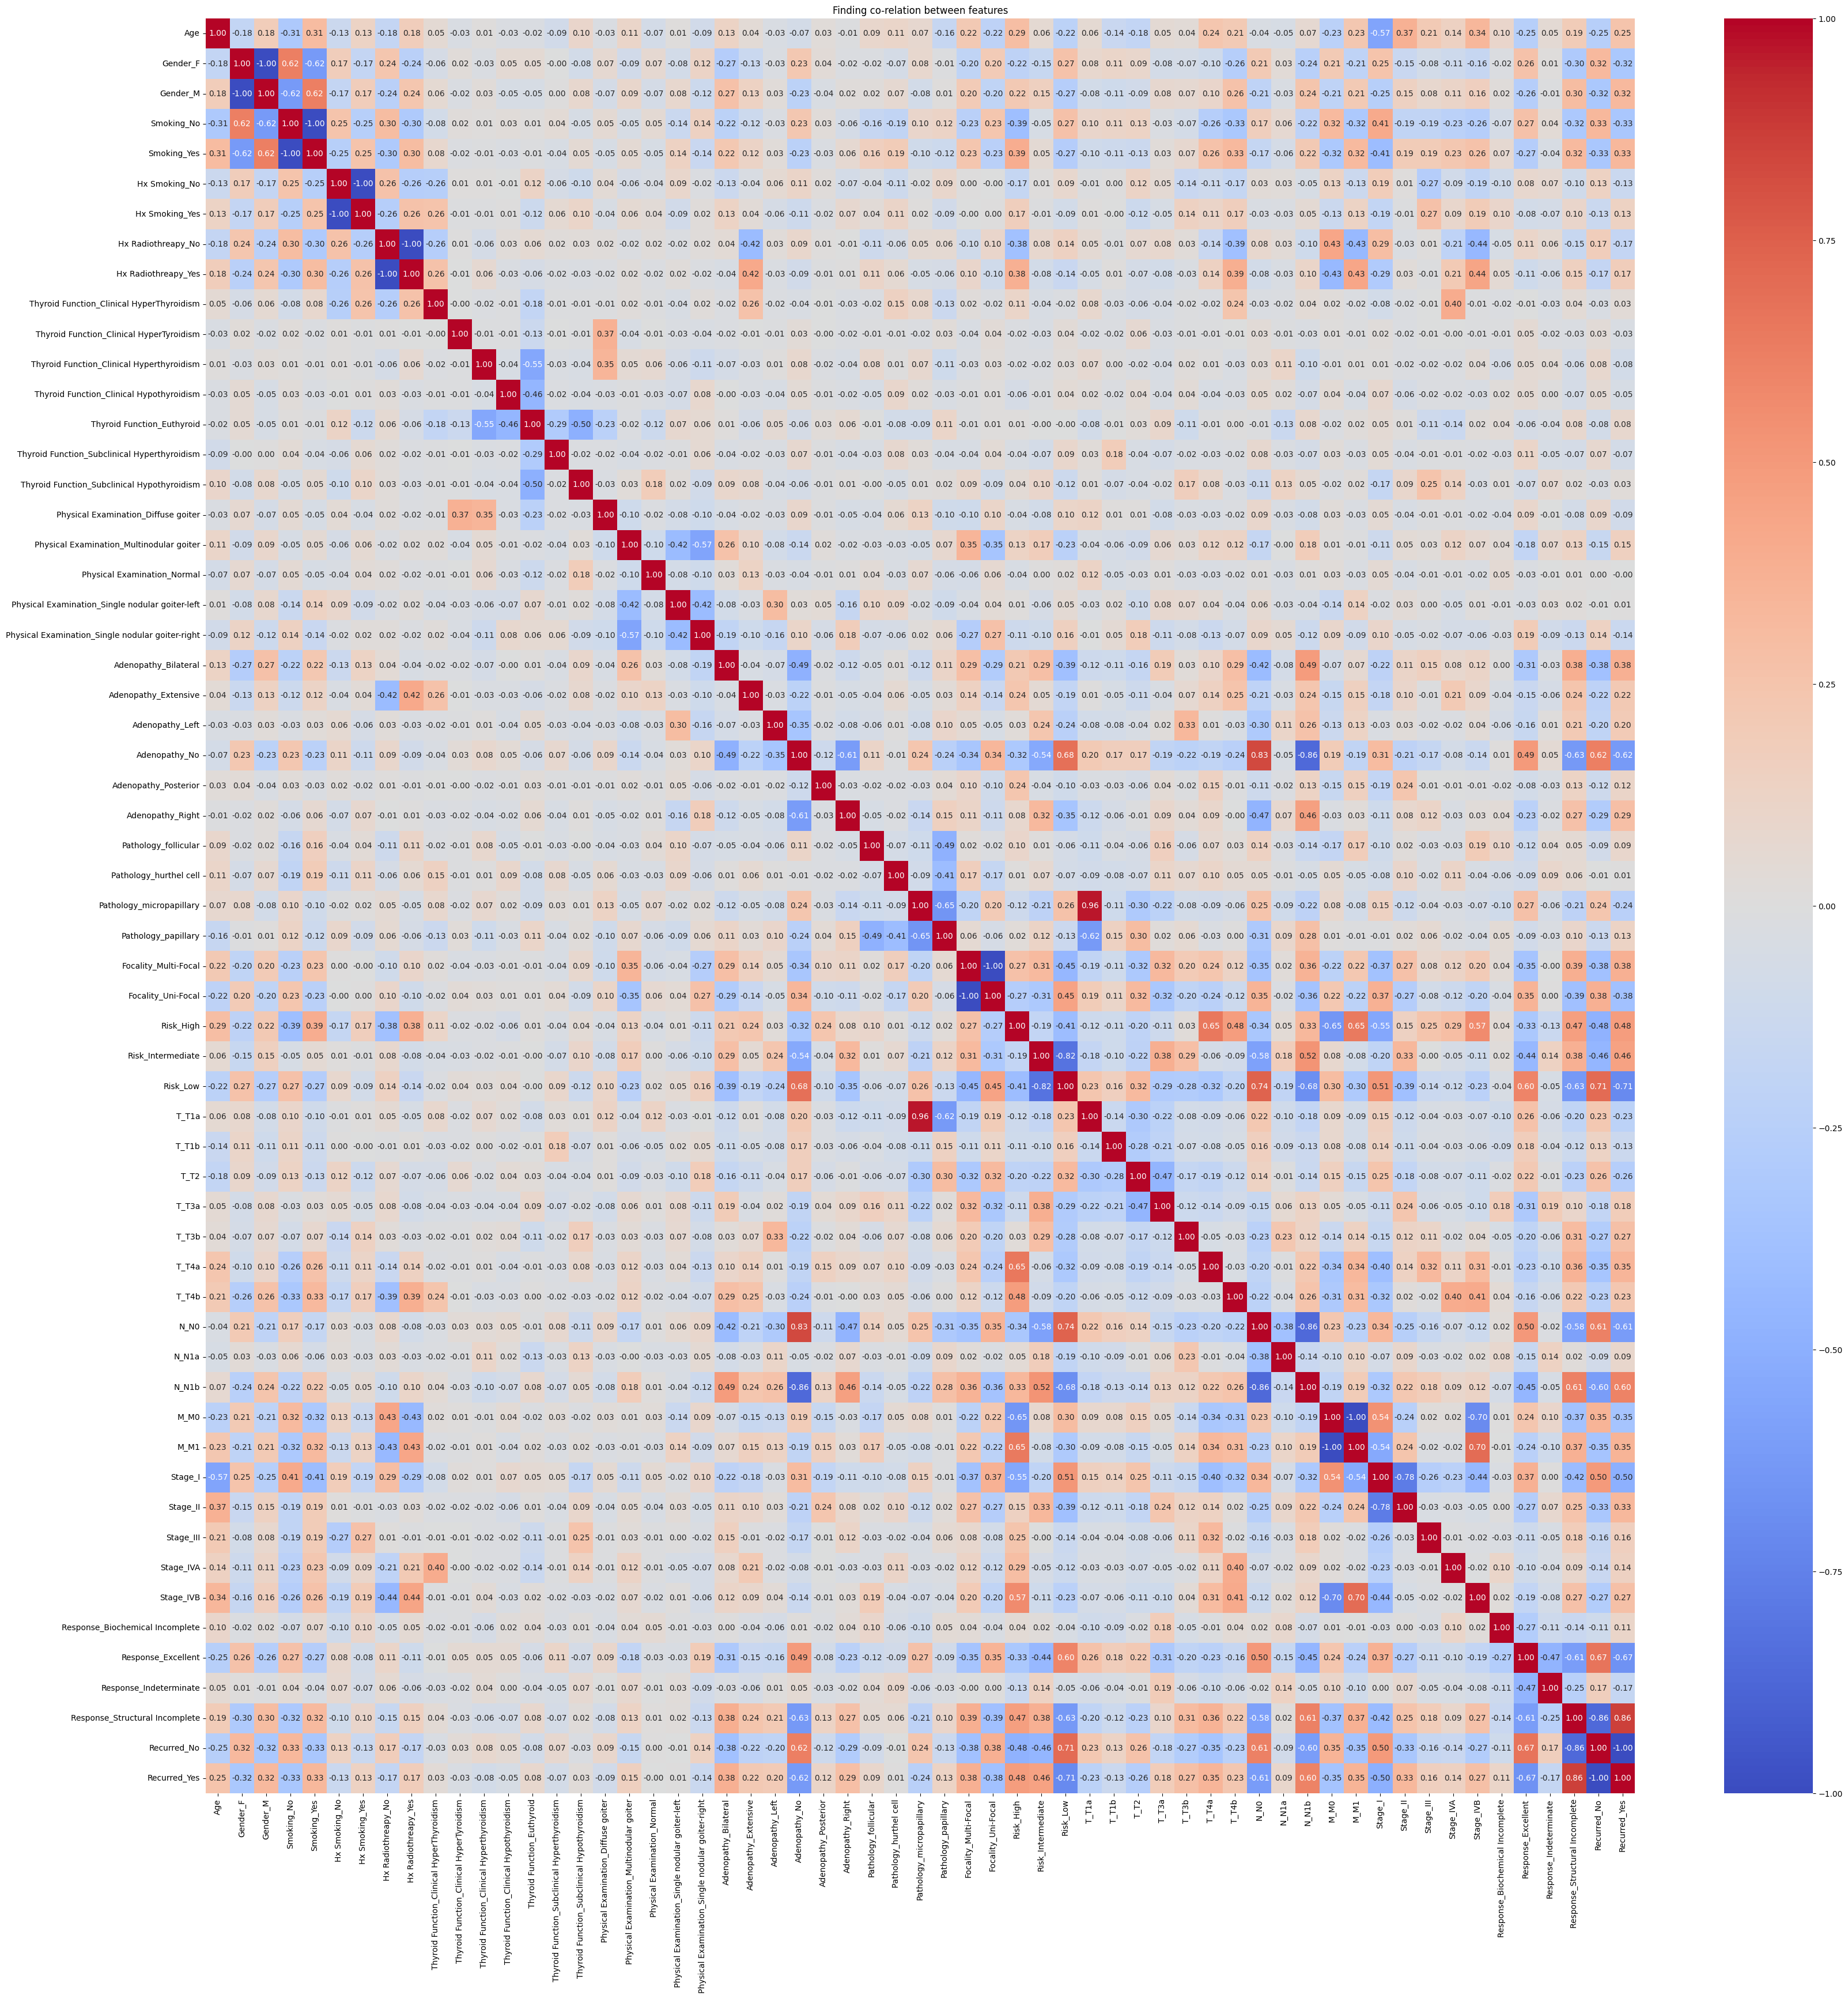

In [ ]:
corr=new_df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")
plt.title("Finding co-relation between features")
plt.show()                                                                      #Creating a heatmap for finding the correlation between the features

In [ ]:
X=new_df1.drop('Recurred_Yes',axis=1)
y=new_df1['Recurred_Yes']                                                       #Assigning the independent and dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)      #Splitting the data into test and train

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 52), (76, 52), (300,), (76,))

RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()                                                    #Assigining the random forest regressor model to a variable

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)                                                     #Assigning value to a predicted variable

In [ ]:
y_pred

array([0.99, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 1.  ,
       0.01, 0.  , 0.01, 0.02, 1.  , 1.  , 0.  , 0.05, 1.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.88, 0.  , 0.01, 0.  , 0.  , 0.03, 0.  , 0.  , 0.01, 0.02,
       0.15, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 0.  , 0.02,
       0.01, 0.  , 0.  , 1.  , 0.03, 1.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
       0.26, 0.  , 1.  , 0.03, 0.12, 0.  , 0.  , 0.99, 0.  , 0.  ])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
# Assuming y_tet and y_pred are your true labels and predicted labels (continuous)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)                        # RMSE is the square root of MSE
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
threshold = 0.5
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)                                                    #Calculating the evaluation matrix

Mean Absolute Error: 0.0688157894736842
Mean Squared Error: 0.05485131578947368
Root Mean Squared Error: 0.23420357766155853
Accuracy: 0.9473684210526315


In [ ]:
mean_squared_error(y_test, y_pred)

0.05485131578947368

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.23420357766155853

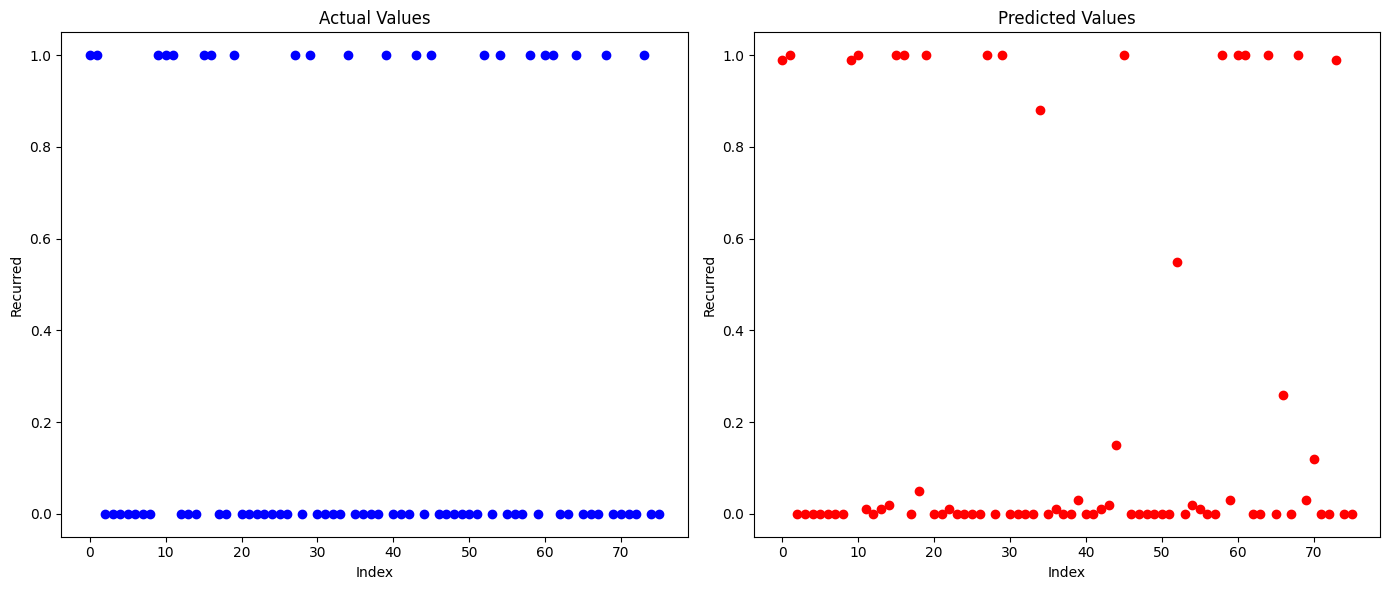

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot actual values
axs[0].scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Recurred')
axs[0].set_title('Actual Values')

# Plot predicted values
axs[1].scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Recurred')
axs[1].set_title('Predicted Values')

plt.tight_layout()
plt.show()                                                                      #plotting two graphs for the predicted value and the test values to see the difference

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test= train_test_split(X,y, test_size=0.2, random_state=0)

X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape                                   #Splitting the data into test and train

((300, 52), (76, 52), (300,), (76,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()

logistic_model.fit(X1_train, y1_train)                                                     #Assigning the logistic model to a varible

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y1_pred = logistic_model.predict(X1_test)
y1_pred                                                                         #Assigining value to predicted value for logistic modle

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = mean_squared_error(y1_test, y1_pred, squared=False)                     # RMSE is the square root of MSE
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
threshold = 0.5
y1_pred_binary = [1 if pred >= threshold else 0 for pred in y1_pred]

accuracy = accuracy_score(y1_test, y1_pred_binary)
print("Accuracy:", accuracy)                                                    #Calculating the evaluation matrix

Mean Absolute Error: 0.039473684210526314
Mean Squared Error: 0.039473684210526314
Root Mean Squared Error: 0.19867985355975656
Accuracy: 0.9605263157894737


In [ ]:
y1_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

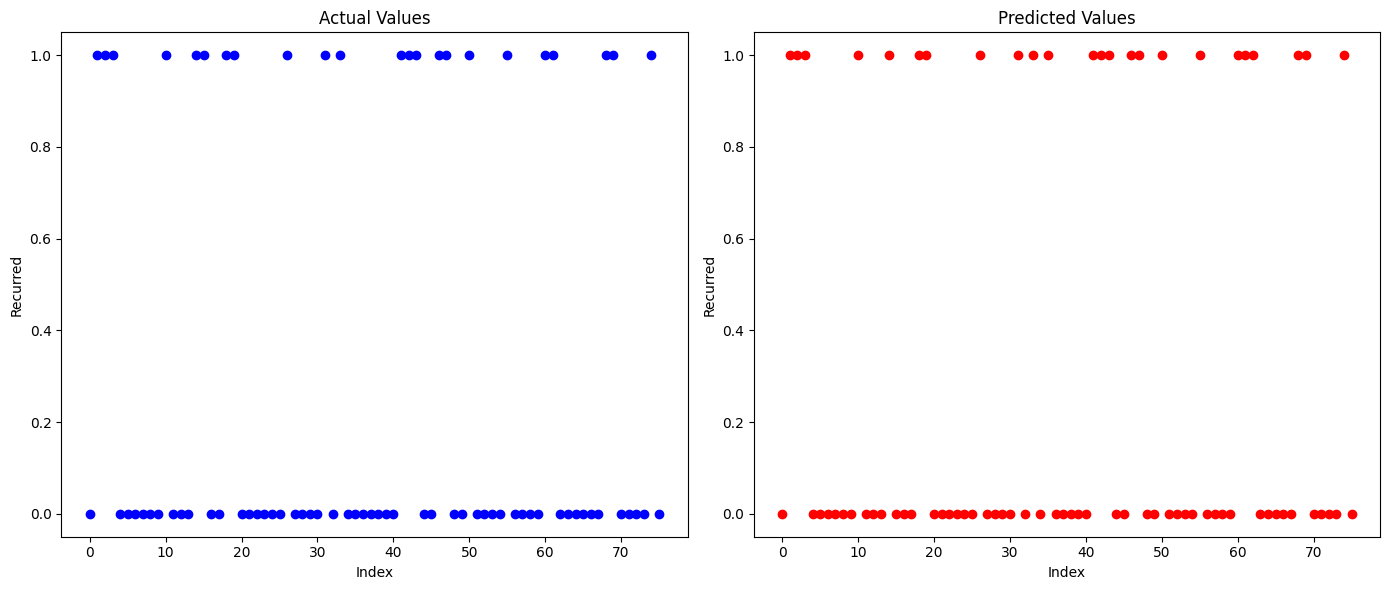

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot actual values
axs[0].scatter(range(len(y1_test)), y1_test, color='blue', label='Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Recurred')
axs[0].set_title('Actual Values')

# Plot predicted values
axs[1].scatter(range(len(y1_test)), y1_pred, color='red', label='Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Recurred')
axs[1].set_title('Predicted Values')

plt.tight_layout()
plt.show()                                                                      #plotting two graphs for the predicted value and the test values to see the difference

KNN Regression

In [ ]:
X2_train, X2_test, y2_train, y2_test= train_test_split(X,y, test_size=0.2, random_state=0)

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape                                  #Diving the dataset into test and train

((300, 52), (76, 52), (300,), (76,))

In [ ]:
# Create a kNN regression model
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X2_train, y2_train)


KNeighborsRegressor()

In [ ]:
# Make predictions on the testing set
y2_pred = knn_regressor.predict(X2_test)
y2_pred

array([0. , 0.6, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ,
       0.2, 0.8, 0. , 0. , 0. , 0.8, 1. , 0.2, 0. , 0. , 0.6, 0. , 0. ,
       0.6, 0. , 0. , 0. , 0.6, 0.4, 0. , 0.6, 0. , 0.2, 0.2, 0. , 0.4,
       0. , 0. , 0.6, 0.8, 0.8, 0. , 0. , 0.8, 0.8, 0. , 0. , 0.2, 0. ,
       0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.4, 0.4, 0.4, 0.2, 0. ,
       0.2, 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0.6, 0.4, 0. ])

In [ ]:
# Calculate MAE, MSE, RMSE, and Accuracy
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
accuracy = knn_regressor.score(X2_test, y2_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Accuracy:", accuracy)                                        #Calculating evaluation matrix

Mean Absolute Error: 0.1789473684210526
Mean Squared Error: 0.1010526315789474
Root Mean Squared Error: 0.31788776569561056
Accuracy: 0.5211812961443806


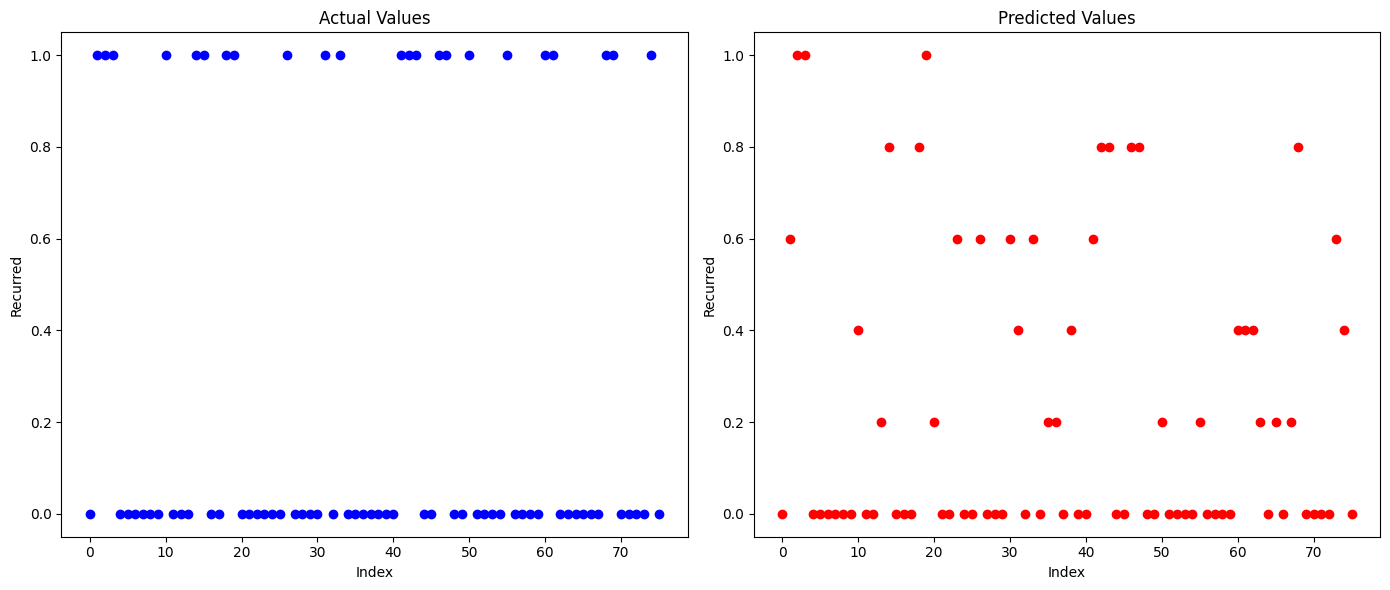

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot actual values
axs[0].scatter(range(len(y_test)), y2_test, color='blue', label='Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Recurred')
axs[0].set_title('Actual Values')

# Plot predicted values
axs[1].scatter(range(len(y2_test)), y2_pred, color='red', label='Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Recurred')
axs[1].set_title('Predicted Values')

plt.tight_layout()
plt.show()                                                                      #plotting two graphs for the predicted value and the test values to see the difference